<a href="https://colab.research.google.com/github/Dyinastie/PVCK_3D_Dyinastie/blob/main/PCVK_Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 80


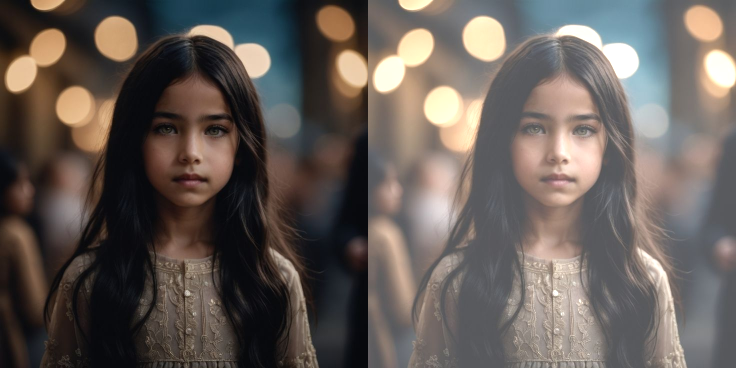

In [4]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Girl.jpeg')
original = cv.resize(original, (0,0), fx=0.5, fy=0.5)
brigtness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brigtness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simple tanpa loop
# brigness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brigtness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

Soal 1 : Implementasi Invers

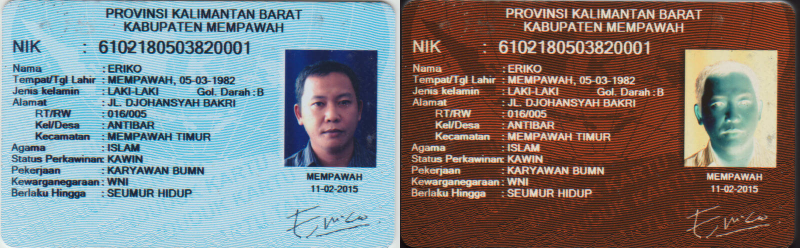

In [7]:
ktp = cv.imread('/content/drive/MyDrive/Images/KTP.jpg')
ktp = cv.resize(ktp, (0,0), fx=0.5, fy=0.5)

# Invers Image
invers_image = 255 - ktp

final_frame = cv.hconcat((ktp, invers_image))
cv2_imshow(final_frame)

Soal 2 : Implementasi Contrast

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 -3.0]: 2


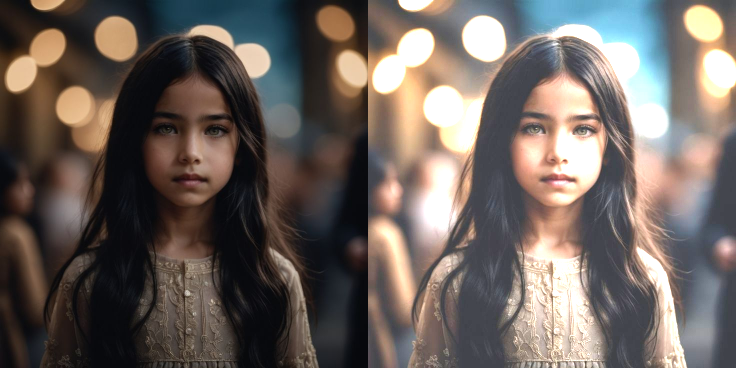

In [12]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 -3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Girl.jpeg')
original = cv.resize(original, (0,0), fx=0.5, fy=0.5)

# Cara simple tanpa loop
brigness_contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final_frame = cv.hconcat((original, brigness_contrast_image))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 -3.0]: 2


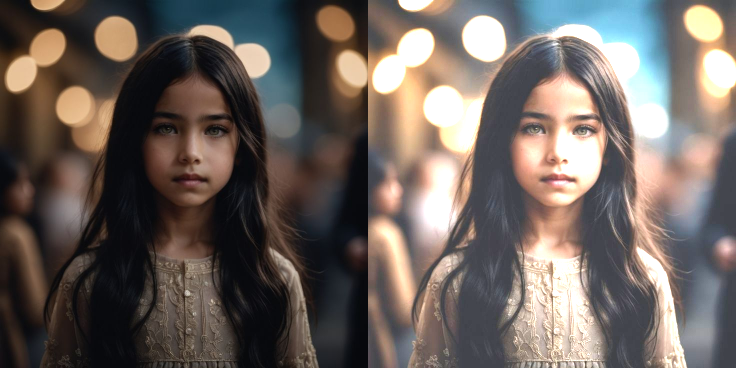

In [15]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 -3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Girl.jpeg')
original = cv.resize(original, (0,0), fx=0.5, fy=0.5)

# Inisialisasi array untuk menyimpan gambar hasil transformasi
contrast_brightness_image = np.zeros(original.shape, original.dtype)

# Akses setiap piksel dan terapkan rumus: g(x, y) = a * f(x, y) + b
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_brightness_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

# Menampilkan gambar asli dan gambar setelah transformasi kontras + kecerahan
final_frame = cv.hconcat((original, contrast_brightness_image))
cv2_imshow(final_frame)

Soal 3 : Implementasi Transformasi Logarithmic Brighness

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


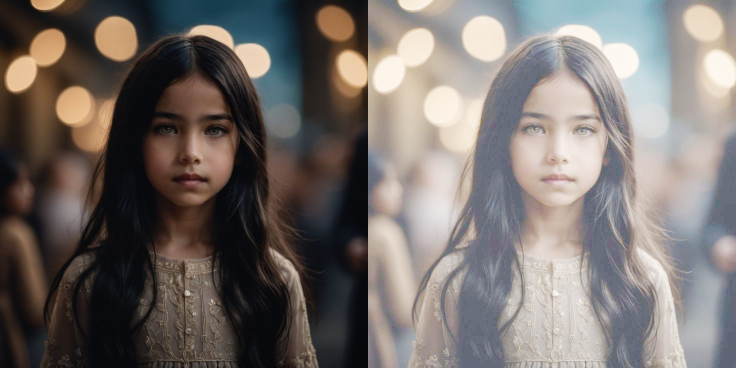

In [16]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Girl.jpeg')
original = cv.resize(original, (0,0), fx=0.5, fy=0.5)

# Mendefinisikan konstanta c
c = 255 / np.log(1 + np.max(original))  # Nilai c dihitung untuk menjaga rentang output

# Inisialisasi array untuk menyimpan gambar hasil transformasi
log_transform_image = c * np.log(1 + original)

# Pastikan nilai berada dalam rentang 0-255 dan konversi ke tipe data uint8
log_transform_image = np.array(log_transform_image, dtype=np.uint8)

# Menampilkan gambar asli dan gambar setelah transformasi log
final_frame = cv.hconcat((original, log_transform_image))
cv2_imshow(final_frame)

Soal 4 : Implementasi Grayscale

a. Averaging

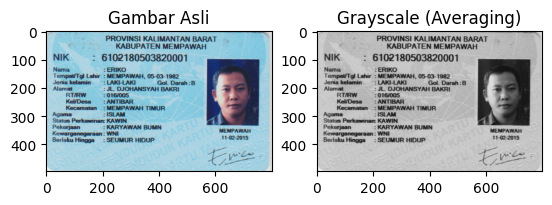

In [37]:
ktp_1 = cv.imread('/content/drive/MyDrive/Images/KTP.jpg')
ktp_1 = cv.cvtColor(ktp_1, cv.COLOR_BGR2RGB)

# Mendapatkan dimensi gambar
tinggi, lebar = ktp_1.shape[:2]

# Inisialisasi array untuk menyimpan hasil grayscale
grayscale_avg = np.zeros((tinggi, lebar), dtype=np.uint8)

# Akses setiap piksel
for y in range(tinggi):
    for x in range(lebar):
        # Mendapatkan nilai R, G, B
        R, G, B = ktp_1[y, x].astype(np.int32)
        # Metode Averaging
        average_value = (R + G + B) / 3
        grayscale_avg[y, x] = np.clip(average_value, 0, 255)

# Subplot 1: Gambar Asli
plt.subplot(1, 2, 1)  # 1 row, 2 columns, posisi 1
plt.imshow(ktp_1)
plt.title('Gambar Asli')

# Subplot 2: Gambar Grayscale (Averaging)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, posisi 2
plt.imshow(grayscale_avg, cmap='gray')
plt.title('Grayscale (Averaging)')

# Menampilkan kedua gambar secara berdampingan
plt.show()

b. Lightness

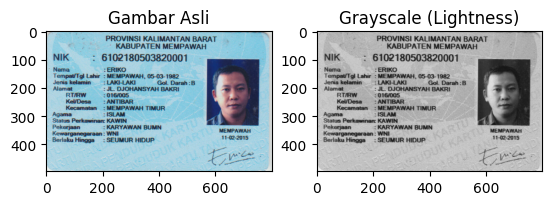

In [39]:
ktp_2 = ktp_1.copy()

# Mendapatkan dimensi gambar
tinggi, lebar = ktp_2.shape[:2]

# Inisialisasi array untuk menyimpan hasil grayscale
grayscale_lightness = np.zeros((tinggi, lebar), dtype=np.uint8)

# Akses setiap piksel
for y in range(tinggi):
    for x in range(lebar):
        # Mendapatkan nilai R, G, B
        R, G, B = ktp_1[y, x].astype(np.int32)
        # Metode Lightness
        lightness_value = (np.max([R, G, B]) + np.min([R, G, B])) / 2
        grayscale_lightness[y, x] = np.clip(lightness_value, 0, 255)

# Subplot 1: Gambar Asli
plt.subplot(1, 2, 1)  # 1 row, 2 columns, posisi 1
plt.imshow(ktp_2)
plt.title('Gambar Asli')

# Subplot 2: Gambar Grayscale (Lightness)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, posisi 2
plt.imshow(grayscale_lightness, cmap='gray')
plt.title('Grayscale (Lightness)')

# Menampilkan kedua gambar secara berdampingan
plt.show()

c. Luminance

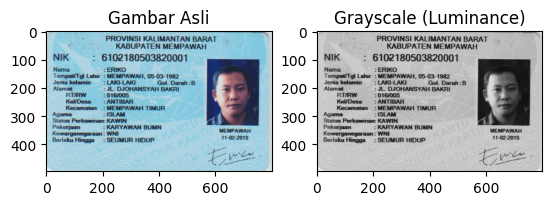

In [35]:
ktp_3 = ktp_1.copy()

# Mendapatkan dimensi gambar
tinggi, lebar = ktp_3.shape[:2]

# Inisialisasi array untuk menyimpan hasil grayscale
grayscale_luminance = np.zeros((tinggi, lebar), dtype=np.uint8)

# Akses setiap piksel
for y in range(tinggi):
    for x in range(lebar):
        # Mendapatkan nilai R, G, B
        R, G, B = ktp_1[y, x].astype(np.int32)
        # Metode Luminance
        luminance_value = 0.21 * R + 0.72 * G + 0.07 * B
        grayscale_luminance[y, x] = np.clip(luminance_value, 0, 255)

# Subplot 1: Gambar Asli
plt.subplot(1, 2, 1)  # 1 row, 2 columns, posisi 1
plt.imshow(ktp_3)
plt.title('Gambar Asli')

# Subplot 2: Gambar Grayscale (Luminance)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, posisi 2
plt.imshow(grayscale_luminance, cmap='gray')
plt.title('Grayscale (Luminance)')

# Menampilkan kedua gambar secara berdampingan
plt.show()

Soal 5

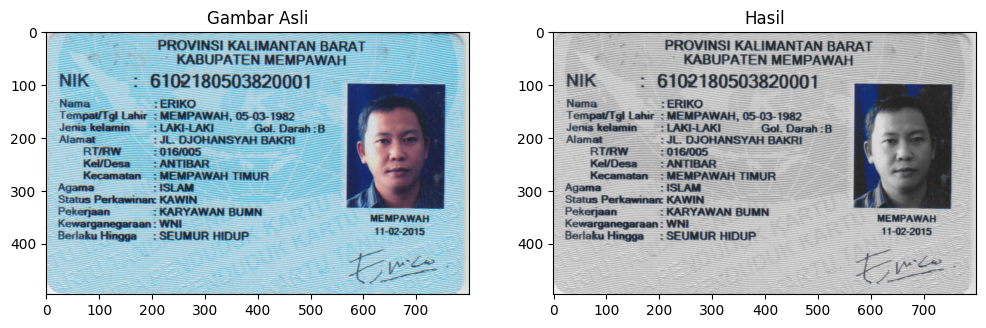

In [43]:
# Salin gambar
ktp_4 = ktp_1.copy()

# Mendapatkan dimensi gambar
tinggi, lebar = ktp_4.shape[:2]

# Inisialisasi array untuk menyimpan hasil
grayscale_image = np.zeros((tinggi, lebar, 3), dtype=np.uint8)
colored_image = np.zeros((tinggi, lebar, 3), dtype=np.uint8)

# Tentukan batas bawah dan batas atas untuk warna biru dalam format RGB
lower_blue = np.array([0, 0, 100])      # Batas bawah warna biru (R, G, B)
upper_blue = np.array([100, 100, 255])  # Batas atas warna biru (R, G, B)

# Masker untuk warna biru
biru = cv.inRange(ktp_4, lower_blue, upper_blue)

# Ubah seluruh gambar menjadi grayscale
gray_image = cv.cvtColor(ktp_4, cv.COLOR_RGB2GRAY)
grayscale_image[:, :, 0] = gray_image
grayscale_image[:, :, 1] = gray_image
grayscale_image[:, :, 2] = gray_image

# Terapkan masker untuk mempertahankan warna biru
colored_image[biru > 0] = ktp_4[biru > 0]
grayscale_image[biru > 0] = ktp_4[biru > 0]

# Menampilkan gambar hasil dengan matplotlib
plt.figure(figsize=(12, 6))

# Subplot 1: Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(ktp_4)
plt.title('Gambar Asli')

# Subplot 2: Gambar dengan warna biru dipertahankan
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image)
plt.title('Hasil')

# Menampilkan semua gambar secara berdampingan
plt.show()
